In [1]:
import os

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchio as tio

from modules.Dataset import MRIDataset, MRIDatasets
from modules.Utils import plot_sub, get_file_names

In [2]:
#pd.set_option('display.max_rows', 500)

In [3]:
dataset_ = MRIDatasets.FeTA_BalancedDistribution
dataset_path = "data/feta2.1_last/"

train = MRIDataset(dataset_, "train", dataset_path)
val = MRIDataset(dataset_, "val", dataset_path)
test = MRIDataset(dataset_, "test", dataset_path)

print(f"Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

Train: 58, Val: 10, Test: 10


In [4]:
sub = train[3]
mri = sub[0]
mask = sub[1]

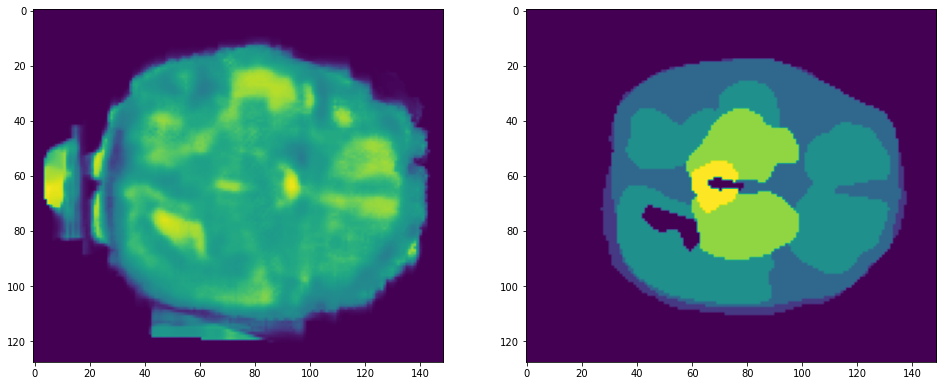

In [8]:
index = 45
#plt.figure(figsize=(9, 9))
plot_sub(mri[:, :, index], mask[:, :, index], fig_size=(25, 25))

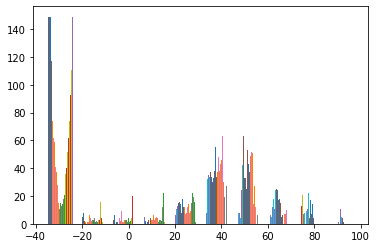

In [11]:
plt.hist(mri[:, :, index])
plt.show()

In [ ]:
paths = get_file_names('data/feta2.1_last/')
t2_paths = [path[0] for _, path in paths.items()]
mask_paths = [path[1] for _, path in paths.items()]

landmarks = tio.HistogramStandardization.train(images_paths=t2_paths, 
                                               mask_path=mask_paths, 
                                               output_path='t2_feta_landmarks.npy')

landmarks = {'t2': 't2_feta_landmarks.npy'}
torch.save(landmarks, 't2_feta_landmarks.pth')